<a href="https://colab.research.google.com/github/dev-saad808/BioInfo-Drug-Discovery/blob/main/Drug_Discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Loading Data






## Install Required Libraries

In [5]:
# prompt: install chemb websource client

!pip install chembl_webresource_client


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 5.3 MB/s eta 0:00:00


## Import Required Libraries

In [6]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

## Search for Target Protien

In [7]:
target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
2,[],Murine coronavirus,Murine coronavirus,14.0,False,CHEMBL5209664,[],ORGANISM,694005
3,[],Canine coronavirus,Canine coronavirus,14.0,False,CHEMBL5291668,[],ORGANISM,11153
4,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
5,[],Human coronavirus OC43,Human coronavirus OC43,13.0,False,CHEMBL5209665,[],ORGANISM,31631
6,[],Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,694009
7,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
8,[],Severe acute respiratory syndrome-related coro...,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,694009
9,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


## Select and Load Data for SARS coronavirus 3C-like proteinase

As, SARS coronavirus 3C-like proteinase is at 6th index, we will get it's id using index.

In [39]:
selected_target = targets.target_chembl_id[6]
selected_target

'CHEMBL3927'

 Retrieve bioactivity data for for selected target `*coronavirus 3C-like proteinase (CHEMBL3927)*`

In [40]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

df = pd.DataFrame.from_dict(res)
df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,13.5
3,None,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,13.11
4,None,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,2.0


Confirm that we only molecules os standard_type `IC50`

In [41]:
df.standard_type.unique()

array(['IC50'], dtype=object)

## Saving Bioactivity data to CSV file.

In [11]:
!mkdir 'Bioinfo Drug Discovery'

In [12]:
df.to_csv("Bioinfo Drug Discovery/bioactivity_data.csv", index=False)

In [13]:
!ls /content/'Bioinfo Drug Discovery'

bioactivity_data.csv


## Add files to Gdrive

We need to add files to drive, so they can be accessed from anywhere.
For that, we have to mount drive first.

In [14]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


Now, we need to save same csv file in drive

In [15]:
!mkdir /content/gdrive/MyDrive/'Bioinfo Drug Discovery'

mkdir: cannot create directory ‘/content/gdrive/MyDrive/Bioinfo Drug Discovery’: File exists


In [16]:
! cp /content/'Bioinfo Drug Discovery'/bioactivity_data.csv /content/gdrive/MyDrive/'Bioinfo Drug Discovery'


In [17]:
ls /content/gdrive/MyDrive/'Bioinfo Drug Discovery'

bioactivity_data.csv  bioactivity_pre-processed_data.csv


In [18]:
!head /content/gdrive/MyDrive/'Bioinfo Drug Discovery'/bioactivity_data.csv

action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS coronavirus main protease (SARS CoV 3C-like protease),B,,,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,,,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '18.28', 'le': '0.33', 'lle': '3.25', 'sei'

# 2. Data Pre-Processing

## Handle Missing Data

Check and drop, id any compound has missing value

In [42]:
clean_data = df[df.standard_value.notna()]
clean_data

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,13.5
3,None,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,13.11
4,None,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25516041,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5336133,Inhibition of SARS-CoV N-terminal 6His-SUMO-ta...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,pIC50,None,UO_0000065,None,6.42
243,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25516042,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5336133,Inhibition of SARS-CoV N-terminal 6His-SUMO-ta...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,0.165
244,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25516043,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5336133,Inhibition of SARS-CoV N-terminal 6His-SUMO-ta...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,0.161
245,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25516044,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5336133,Inhibition of SARS-CoV N-terminal 6His-SUMO-ta...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,pIC50,None,UO_0000065,None,6.78


## Getting desired Columns from data

In [46]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value','type']
selected_data = clean_data[selection]
selected_data

,molecule_chembl_id,canonical_smiles,standard_value,type
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,IC50
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,IC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,IC50
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,IC50
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,IC50
...,...,...,...,...
242,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,380.19,pIC50
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],165.0,IC50
244,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,161.0,IC50
245,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],165.96,pIC50


In [50]:
# prompt: Using dataframe selected_data: get data where type is -Log IC50

# Select rows where the 'type' column is equal to '-Log IC50'
selected_data[selected_data['type'] == '-Log IC50']


,molecule_chembl_id,canonical_smiles,standard_value,type
22,CHEMBL208732,O=C(CSc1nccc(-c2csc(-c3ccccc3)n2)n1)Nc1cc(Cl)c...,3019.95,-Log IC50
24,CHEMBL210146,COc1cccc(-c2nc(SCC(=O)Nc3ccc([N+](=O)[O-])cc3)...,301995.17,-Log IC50
26,CHEMBL207458,CCOC(=O)c1cnc(SCC(=O)Nc2ccc([N+](=O)[O-])cc2)nc1N,251188.64,-Log IC50
28,CHEMBL207484,COC(OC)c1cc(O)nc(SCC(=O)Nc2ccc(C(F)(F)F)cc2)n1,204173.79,-Log IC50
30,CHEMBL207207,Cc1cc(O)nc(SCC(=O)Nc2cc(Cl)ccc2Oc2ccccc2)n1,100000.0,-Log IC50
32,CHEMBL210487,CCC(Sc1nc(O)c(C#N)c(-c2cccc(OC)c2)n1)C(=O)Nc1c...,60255.96,-Log IC50
34,CHEMBL380470,COc1ccc(NC(=O)CSc2nc(O)cc(-c3ccccc3)n2)cc1OC,45708.82,-Log IC50
36,CHEMBL210612,CC(C)c1ccc(NC(=O)CSc2nccc(-c3cccs3)n2)cc1,40738.03,-Log IC50
38,CHEMBL209667,O=C(CSc1nccc(-c2cc(-c3ccccc3Cl)no2)n1)Nc1ccc(C...,15135.61,-Log IC50
40,CHEMBL210097,O=C(CSc1nccc(-c2cc(-c3ccc(Cl)cc3Cl)no2)n1)Nc1c...,15135.61,-Log IC50


In [51]:
# prompt: Using dataframe selected_data: get data where type is pIC50

# Select rows where the 'type' column is equal to 'pIC50'
selected_data[selected_data['type'] == 'pIC50']

,molecule_chembl_id,canonical_smiles,standard_value,type
242,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,380.19,pIC50
245,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],165.96,pIC50
246,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,162.18,pIC50


In [52]:
# Only considering values of type IC50
selected_data = selected_data[selected_data.type == 'IC50']
selected_data

,molecule_chembl_id,canonical_smiles,standard_value,type
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,IC50
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,IC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,IC50
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,IC50
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,IC50
...,...,...,...,...
239,CHEMBL4459894,CCOC(=O)/C=C/[C@H](Cc1c[nH]cn1)NC[C@@H]1C(NC(=...,2000000.0,IC50
240,CHEMBL18786,CN(C)CCCSc1ccccc1NC(=O)/C=C/c1ccccc1,5000.0,IC50
241,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,383.0,IC50
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],165.0,IC50


## Labeling Compounds

The bioactivity data is expressed in **IC50 units** (nM). To categorize the compounds based on their activity, the following criteria will be applied:

1. **Active:** Compounds with IC50 values less than 1000 nM.
2. **Inactive:** Compounds with IC50 values greater than 10,000 nM.
3. **Intermediate:** Compounds with IC50 values between 1000 nM and 10,000 nM (inclusive)."

In [54]:
bioactivity_classes = []
for i in selected_data.standard_value:
  if float(i) >= 10000:
    bioactivity_classes.append("inactive")
  elif float(i) <= 1000:
    bioactivity_classes.append("active")
  else:
    bioactivity_classes.append("intermediate")

## Adding column of Bioactivity Classes in Data

In [55]:
selected_data['bioactivity_class'] = bioactivity_classes
selected_data

<ipython-input-55-fce86e188aec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['bioactivity_class'] = bioactivity_classes


,molecule_chembl_id,canonical_smiles,standard_value,type,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,IC50,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,IC50,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,IC50,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,IC50,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,IC50,intermediate
...,...,...,...,...,...
239,CHEMBL4459894,CCOC(=O)/C=C/[C@H](Cc1c[nH]cn1)NC[C@@H]1C(NC(=...,2000000.0,IC50,inactive
240,CHEMBL18786,CN(C)CCCSc1ccccc1NC(=O)/C=C/c1ccccc1,5000.0,IC50,intermediate
241,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,383.0,IC50,active
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],165.0,IC50,active


## Save Pre-processed Data to CSV file

In [56]:
selected_data.to_csv("Bioinfo Drug Discovery/bioactivity_pre-processed_data.csv", index=False)

Check file saved in Colab

In [57]:
! ls /content/'Bioinfo Drug Discovery'

bioactivity_data.csv  bioactivity_pre-processed_data.csv


## Copy Pre-processed Data to Gdrive

In [58]:
! cp /content/'Bioinfo Drug Discovery'/bioactivity_pre-processed_data.csv /content/gdrive/MyDrive/'Bioinfo Drug Discovery'


Check file saved in Gdrive

In [59]:
! ls /content/gdrive/MyDrive/'Bioinfo Drug Discovery'

bioactivity_data.csv  bioactivity_pre-processed_data.csv


# 3. Data Modification

## Install rdkit

In [60]:
!pip install rdkit-pypi -qqq

## Load Previously saved pre-processed data. (For Safety)

In [61]:
df = pd.read_csv("Bioinfo Drug Discovery/bioactivity_pre-processed_data.csv")
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,type,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,IC50,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,IC50,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,IC50,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,IC50,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,IC50,intermediate


## Import libraries

In [62]:
import numpy as np
import rdkit
from rdkit.Chem import Descriptors, Lipinski

## Calculate Lipinski descriptors


Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

1. Molecular weight < 500 Dalton
2. Octanol-water partition
coefficient (LogP) < 5
3. Hydrogen bond donors < 5
4. Hydrogen bond acceptors < 10

In [63]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=rdkit.Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [64]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
209,758.715,1.60970,6.0,9.0
210,340.492,4.38230,1.0,3.0
211,328.466,3.34562,1.0,5.0
212,222.379,-1.99300,1.0,3.0


Combine Main dataframe and lipinski dataframe

In [65]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,type,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,IC50,intermediate,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,IC50,intermediate,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,IC50,inactive,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,IC50,inactive,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,IC50,intermediate,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...,...,...
209,CHEMBL4459894,CCOC(=O)/C=C/[C@H](Cc1c[nH]cn1)NC[C@@H]1C(NC(=...,2000000.0,IC50,inactive,758.715,1.60970,6.0,9.0
210,CHEMBL18786,CN(C)CCCSc1ccccc1NC(=O)/C=C/c1ccccc1,5000.0,IC50,intermediate,340.492,4.38230,1.0,3.0
211,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,383.0,IC50,active,328.466,3.34562,1.0,5.0
212,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],165.0,IC50,active,222.379,-1.99300,1.0,3.0


## Convert IC50 to pIC50

To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column

In [79]:
def pIC50(dataframe):
    pIC50 = []

    for i in dataframe['standard_value']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    dataframe['pIC50'] = pIC50
    new_dataframe = dataframe.drop('standard_value', axis=1)

    return new_dataframe

In [71]:
-np.log10( (10**-9)* 100000000 )

np.float64(1.0)

In [73]:
-np.log10( (10**-9)* 10000000000 )


np.float64(-1.0)

In [67]:
df_combined.standard_value.describe()

,standard_value
count,2.140000e+02
mean,5.595410e+04
std,1.780169e+05
min,5.000000e+01
25%,4.805000e+03
50%,1.340000e+04
75%,4.000000e+04
max,2.000000e+06


Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In my case there is max value of 2.000000e+06 so, I don't need to normalize data

In [80]:
df_final = pIC50(df_combined)
df_final

,molecule_chembl_id,canonical_smiles,type,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,IC50,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,IC50,intermediate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,IC50,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,IC50,inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],IC50,intermediate,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...,...
209,CHEMBL4459894,CCOC(=O)/C=C/[C@H](Cc1c[nH]cn1)NC[C@@H]1C(NC(=...,IC50,inactive,758.715,1.60970,6.0,9.0,2.698970
210,CHEMBL18786,CN(C)CCCSc1ccccc1NC(=O)/C=C/c1ccccc1,IC50,intermediate,340.492,4.38230,1.0,3.0,5.301030
211,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,IC50,active,328.466,3.34562,1.0,5.0,6.416801
212,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],IC50,active,222.379,-1.99300,1.0,3.0,6.782516


In [81]:
df_final.pIC50.describe()

,pIC50
count,214.000000
mean,4.970342
std,0.876865
min,2.698970
25%,4.397940
50%,4.872907
75%,5.318307
max,7.301030


## Removing the 'intermediate' bioactivity class

In [82]:
new_df = df_final[df_final.bioactivity_class != 'intermediate']
new_df

,molecule_chembl_id,canonical_smiles,type,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,IC50,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,IC50,inactive,293.347,3.63080,0.0,3.0,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,IC50,active,372.243,4.39330,0.0,3.0,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,IC50,active,419.243,4.23540,0.0,3.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,IC50,inactive,327.792,4.28420,0.0,3.0,4.950782
...,...,...,...,...,...,...,...,...,...
208,CHEMBL4437284,CON(C)C(=O)[C@H](Cc1c[nH]cn1)NC[C@@H]1C(NC(=O)...,IC50,inactive,747.692,0.51020,6.0,9.0,3.000000
209,CHEMBL4459894,CCOC(=O)/C=C/[C@H](Cc1c[nH]cn1)NC[C@@H]1C(NC(=...,IC50,inactive,758.715,1.60970,6.0,9.0,2.698970
211,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,IC50,active,328.466,3.34562,1.0,5.0,6.416801
212,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],IC50,active,222.379,-1.99300,1.0,3.0,6.782516


# 4. Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors



## Import library

In [84]:
import seaborn as sb
sb.set(style='ticks')
import matplotlib.pyplot as plt

## Frequency plot of the 2 bioactivity classes


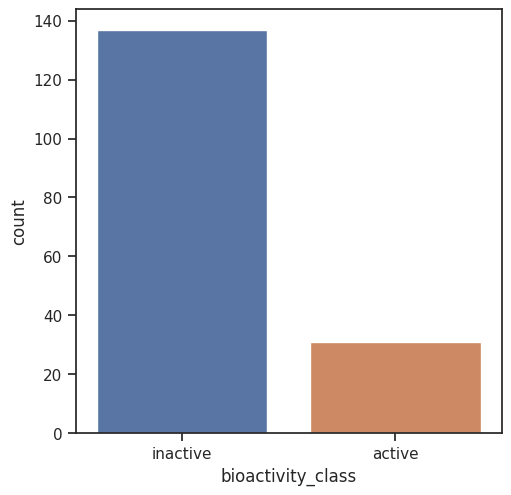

In [116]:
plt.figure(figsize=(5.5, 5.5))
sb.countplot(x='bioactivity_class', data=new_df,hue='bioactivity_class')

plt.savefig('plot_bioactivity_class.pdf')


## Scatter plot of MW versus LogP


It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.



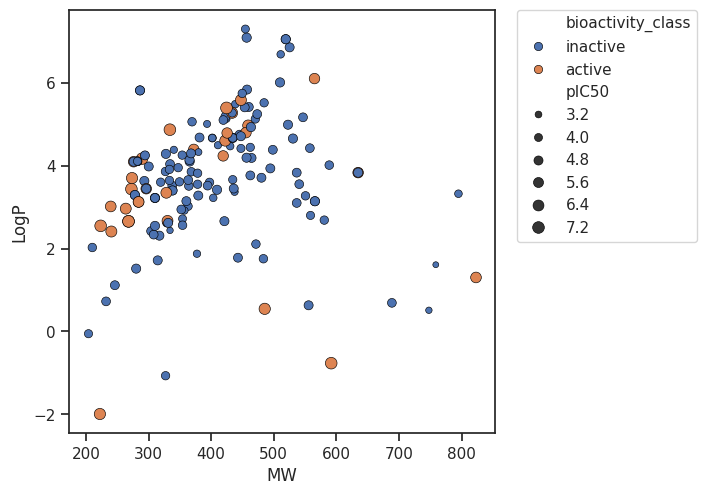

In [91]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=new_df, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=1)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

## Box plots & Statistical analysis | Mann-Whitney U Test



In [105]:
def mannwhitney(dataframe,descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = dataframe[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = dataframe[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

pIC50

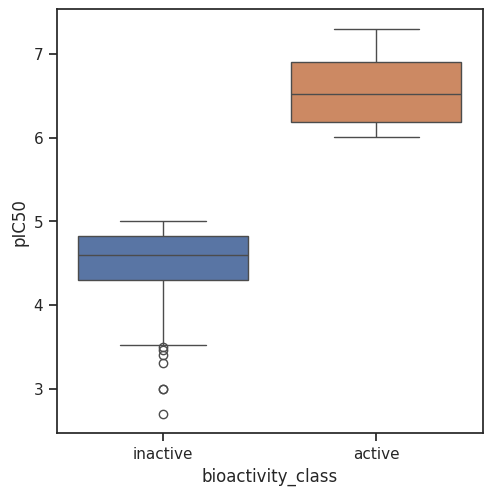

In [117]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = new_df,hue='bioactivity_class')

plt.savefig('plot_ic50.pdf')

In [107]:
mannwhitney(new_df,'pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,4247.0,3.814137e-18,0.05,Different distribution (reject H0)


MW

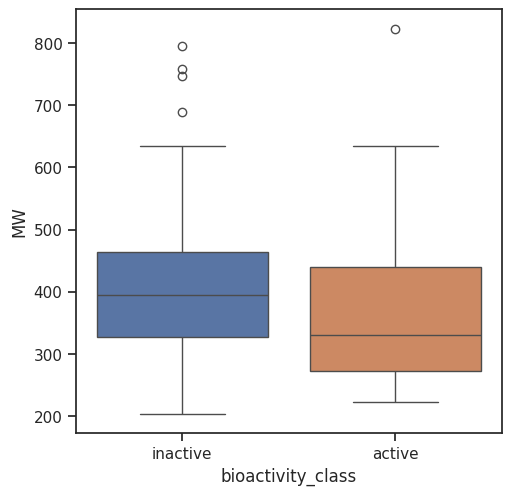

In [118]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = new_df,hue='bioactivity_class')

plt.savefig('plot_MW.pdf')

In [108]:
mannwhitney(new_df,'MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1573.5,0.024644,0.05,Different distribution (reject H0)


LogP

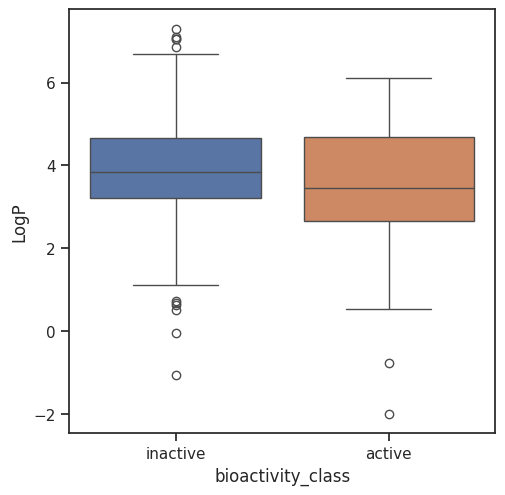

In [119]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = new_df,hue='bioactivity_class')


plt.savefig('plot_LogP.pdf')

In [110]:
mannwhitney(new_df,'LogP')


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1913.5,0.391636,0.05,Same distribution (fail to reject H0)


NumHDonors

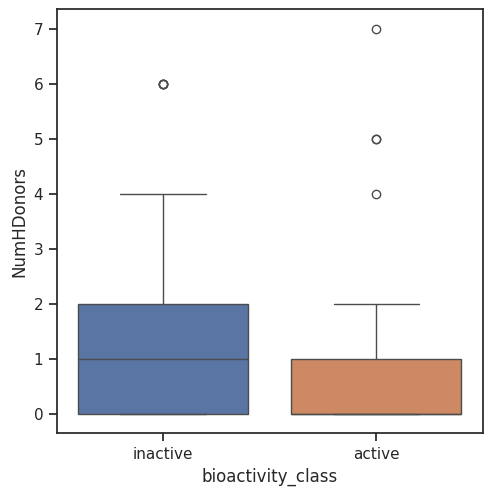

In [120]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = new_df,hue='bioactivity_class')

plt.savefig('plot_NumHDonors.pdf')

In [112]:
mannwhitney(new_df,'NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1360.5,0.001139,0.05,Different distribution (reject H0)


NumHAcceptors

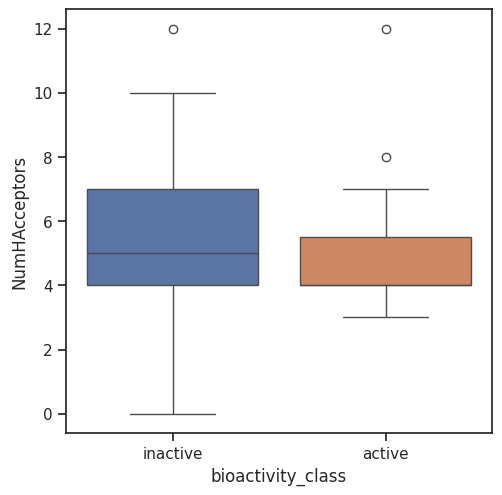

In [121]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = new_df,hue='bioactivity_class')

plt.savefig('plot_NumHAcceptors.pdf')

In [114]:
mannwhitney(new_df,'NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1693.5,0.07538,0.05,Same distribution (fail to reject H0)


## Interpretation of Statistical Results
Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

Lipinski's descriptors
Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), LogP and NumHAcceptors exhibited no difference between the actives and inactives while the other 2 descriptors (MW, NumHDonors) shows statistically significant difference between actives and inactives.